In [1]:
# I will design a for loop to loop through all the srfamp values, 
#  compute the spatial average of the difference between anomalies, 
# and compute the difference between anomalies at the IOD.
# The average and IOD diff values for each srfamp value will be stored 
# in vectors, from which the average values can be inferred.

In [2]:
# Add a command to produce plots directly below cells.
%matplotlib inline
# Import required packages
import numpy as np
import os
# Import xarray and glob for data analysis.
import xarray as xr
from glob import glob
# Dask for processing
import dask as da

os.chdir("/home/561/gp8431")
from climate import StandardGrid
from climate import Projection

import matplotlib.pyplot as plt

# Change working directory.
os.chdir("/scratch/w40/gp8431/run")

In [3]:
# Extract era data
files = glob('/g/data/rt52/era5/pressure-levels/monthly-averaged/t/*/*')
files.sort()
era_all = xr.open_mfdataset(files, combine='by_coords').t #.rename({"t":"temp"})
era_clim = era_all.groupby('time.month').mean()

In [4]:
# Compute temperature anomaly in era data and adjust data.

era_anom = era_all.sel(time=slice('2019-01-01','2019-12-31')).groupby('time.month')-era_clim

era_anom = era_anom.rename({"latitude":"lat", "longitude":"lon", "level":"pfull"})

era_anom = StandardGrid(era_anom, lon_name='lon', lat_name='lat')

era_anom_oct = era_anom.sel(time=slice('2019-10-01','2019-10-31'))

#era_anom['lon'] = (era_anom['lon'] + 180.0)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1361: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1361: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ... 

In [5]:
era_anom_oct

<xarray.DataArray 't' (time: 1, pfull: 37, lat: 721, lon: 1440)>
dask.array<getitem, shape=(1, 37, 721, 1440), dtype=float32, chunksize=(1, 37, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.25 359.5 359.75
  * lat      (lat) float32 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * pfull    (pfull) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time     (time) datetime64[ns] 2019-10-01
    month    (time) int64 10

In [6]:
# Extract nh model data
os.chdir("/scratch/w40/gp8431/run/2001_srfamp_0.0")
nh_for = xr.open_dataset("plevel_daily_ih.nc", decode_times = False).temp
nh_for_davg = nh_for.mean('time')

In [32]:
# Create empty list where average differences for each srfamp will go.
dt_IOD = []
# Create empty list where srfamp values will go.
# FOR NOW, TWO EMPTY LISTS CREATED TO WORK AROUND AN ERROR!
amp_mta = []
amp_lp = []
# Create an empty list to fill with mod_temp_anom arrays for plotting.
mta_list = []
# Create an empty list to fill with lon_p arrays for plotting.
lon_p_list = []

# Define figures to add subplots to.
fig_era = plt.figure(figsize=(16,16))
fig_era_300 = plt.figure(figsize=(16,16))
fig_era_lon_p = plt.figure(figsize=(16,16))
fig_model = plt.figure(figsize=(16,16))

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

In [8]:
era_temp_anom_lon_p = era_anom_oct.sel(lat=0.0, method='nearest')
ax_era_lon_p = fig_era_lon_p.add_subplot(1, 1, 1)
cax_era_lon_p = ax_era_lon_p.pcolormesh(era_temp_anom_lon_p.lon, era_temp_anom_lon_p.pfull, era_temp_anom_lon_p.squeeze().values, vmin=-5, vmax=5)
era_temp_anom_lon_p.plot(ax=ax_era_lon_p)
ax_era_lon_p.set(title = 'era_lon_p')
#cbar_era = fig_era.colorbar(cax_era)
fig_era_lon_p.savefig('/home/561/gp8431/fig_era_lon_p.png')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
###era_temp_anom = era_anom_oct.sel(pfull=1000.0, method='nearest')
era_temp_anom = era_anom_oct.sel(pfull=1000.0, lat=slice(-30.0, 30.0))
ax_era = fig_era.add_subplot(1, 1, 1)
cax_era = ax_era.pcolormesh(era_temp_anom.lon, era_temp_anom.lat, era_temp_anom.squeeze().values, vmin=-5, vmax=5)
era_temp_anom.plot(ax=ax_era)
ax_era.set(title = 'era')
#cbar_era = fig_era.colorbar(cax_era)
fig_era.savefig('/home/561/gp8431/fig_era.png')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.


In [35]:
###era_temp_anom = era_anom_oct.sel(pfull=1000.0, method='nearest')
era_temp_anom_300 = era_anom_oct.sel(pfull=500.0, lat=slice(-30.0, 30.0))
ax_era_300 = fig_era_300.add_subplot(1, 1, 1)
#cax_era_300 = ax_era_300.pcolormesh(era_temp_anom_300.lon, era_temp_anom_300.lat, era_temp_anom_300.squeeze().values, vmin=-5, vmax=5)
era_temp_anom_300.plot(ax=ax_era_300)
ax_era_300.set(title = 'era_300')
#cbar_era = fig_era.colorbar(cax_era)
fig_era_300.savefig('/home/561/gp8431/fig_era_300.png')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
# Initialise an indexing variable 
i = 0

# Extract model data in a loop
for x in ["0.1", "0.2", "0.4", "0.6", "0.8", "1.0", "1.2", "1.4", "10.0"]:
#for x in ["0.0", "0.1", "1.0", "10.0"]:
    # Only extract temp
    ih_for = xr.open_dataset("/scratch/w40/gp8431/run/2001_srfamp_"+x+"/plevel_daily_ih.nc", decode_times = False).temp
    ih_for_davg = ih_for.mean('time')

    mod_lat = xr.open_dataset("plevel_daily_ih.nc", decode_times = False).lat
    mod_lon = xr.open_dataset("plevel_daily_ih.nc", decode_times = False).lon

    # Compute anomaly based on extracted model values.
    mod_anom = ih_for_davg-nh_for_davg

    # Extract the era and model output at the surface.
    # CHANGED TO RESTRICT TO +-30 in lat!!!
    ##era_temp_anom = era_anom_oct.sel(pfull=1000.0, method='nearest')
    ##mod_temp_anom = mod_anom.sel(pfull=1000.0, method='nearest')
    
    era_temp_anom = era_anom_oct.sel(pfull=1000.0, lat=slice(-30.0, 30.0))
    mod_temp_anom = mod_anom.sel(pfull=1000.0, lat=slice(-30.0, 30.0))
    
    mod_temp_anom_ds = mod_temp_anom.to_dataset(name='temp')
    
    # Add dim to mod_temp_anom
    #mod_temp_anom_ds['amp'] = float(x)
    # TRY THIS
    mod_temp_anom_ds['amp'] = amp_mta.append(float(x))
    #mod_temp_anom_ds['amp'] = amp
    
    mta_list.append(mod_temp_anom_ds)
    
    
    # WRITE ANOTHER LIST FOR PLOTTING LON/PRESSURE!
    # FIGURE OUT HOW TO APPEND AMP ONLY ONCE
    mod_temp_anom_eq = mod_anom.sel(lat=0.0, method='nearest')
    mod_temp_anom_eq_ds = mod_temp_anom_eq.to_dataset(name='temp')
    mod_temp_anom_eq_ds['amp'] = amp_lp.append(float(x))
    lon_p_list.append(mod_temp_anom_eq_ds)
    
    ### CHANGE PLOTTING TO FACET AFTER LOOP AND ADD EXTRA DIM!
    
    #ax_mod = fig_model.add_subplot(3, 3, i+1)
    #cax_mod = ax_mod.pcolormesh(mod_lon, mod_lat, mod_temp_anom.squeeze().values)
    #mod_temp_anom.plot(ax=ax_mod)
    #ax_mod.set(title = 'model_' + x)
    ##cbar_mod = fig_model.colorbar(cax_mod)
    #fig_model.savefig('/home/561/gp8431/fig_model.png')
    
    # Average data and model temperatures over Isidoro heating box.
    era_temp_anom_box = era_temp_anom.sel(lat=slice(-5.0, 5.0), lon=slice(55.0, 65.0))
    era_temp_anom_boxav = era_temp_anom_box.mean(dim='lat').mean(dim='lon')

    mod_temp_anom_box = mod_temp_anom.sel(lat=slice(-5.0, 5.0), lon=slice(55.0, 65.0))
    mod_temp_anom_boxav = mod_temp_anom_box.mean(dim='lat').mean(dim='lon')

    # Take the difference in average box temp between model and data.
    diff = era_temp_anom_boxav-mod_temp_anom_boxav
    
    # Convert the diff DataArray to a DataSet.
    diff_ds = diff.to_dataset(name='temp')
    # Add the dimension 'amp' to the DataSet.
    diff_ds['amp'] = amp_mta
    # Append the DataSet to the list.
    dt_IOD.append(diff_ds)

    i = i + 1

In [11]:
# Concatenate the lists along the dimension 'amp'.
dt_IOD_concat = xr.concat(dt_IOD, dim='amp')
mta_list_concat = xr.concat(mta_list, dim='amp')
lon_p_list_concat = xr.concat(lon_p_list, dim='amp')

In [12]:
mta_list_concat['amp'] = amp_mta

In [13]:
lon_p_list_concat['amp'] = amp_lp

In [14]:
mta_list_concat.amp

<xarray.DataArray 'amp' (amp: 9)>
array([ 0.1,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4, 10. ])
Coordinates:
    pfull    float32 1000.0
  * amp      (amp) float64 0.1 0.2 0.4 0.6 0.8 1.0 1.2 1.4 10.0

In [15]:
lon_p_list_concat.amp

<xarray.DataArray 'amp' (amp: 9)>
array([ 0.1,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4, 10. ])
Coordinates:
    lat      float64 1.395
  * amp      (amp) float64 0.1 0.2 0.4 0.6 0.8 1.0 1.2 1.4 10.0

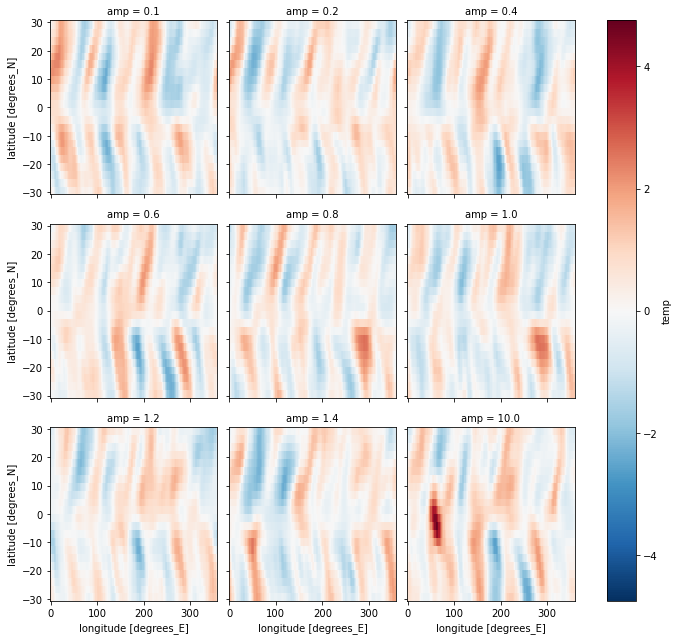

In [16]:
# Plot the mod_temp_anom and lon/p slice using facet.
#plot = mod_temp_anom_ds.plot(x="lon", y="lat", col="amp", col_wrap=3)
#mod_temp_anom_ds.temp.plot()
# PLOT WITHOUT BOUNDS FIRST!
lon_lat_plot = mta_list_concat.temp.plot(x="lon", y="lat", col="amp", col_wrap=3)
##lon_lat_plot = mta_list_concat.temp.plot(x="lon", y="lat", col="amp", col_wrap=3, vmin=-5, vmax=5)
#lon_lat_plot.savefig('/home/561/gp8431/lon_lat_plot.png')

# mta_list gives the list filled with datasets for each 

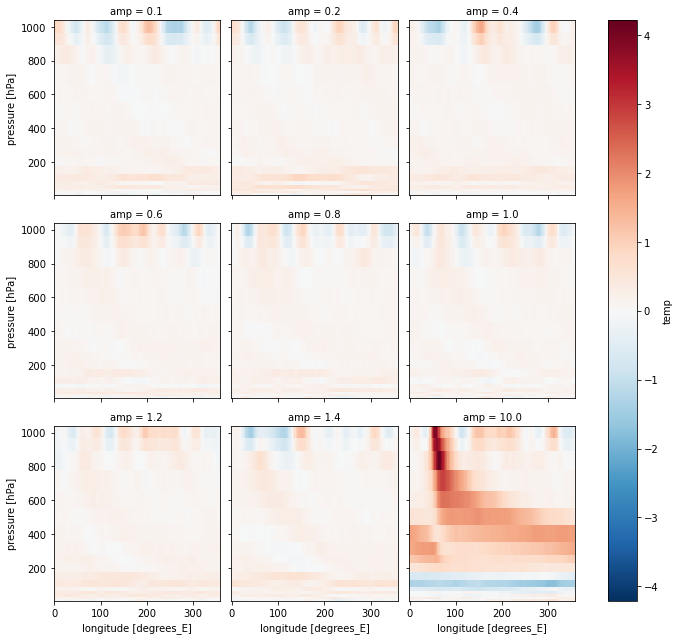

In [17]:
lon_p_plot = lon_p_list_concat.temp.plot(x="lon", y="pfull", col="amp", col_wrap=3)
##lon_p_plot = lon_p_list_concat.temp.plot(x="lon", y="pfull", col="amp", col_wrap=3, vmin=-5, vmax=5)
#lon_p_plot.savefig('/home/561/gp8431/lon_p_plot.png')


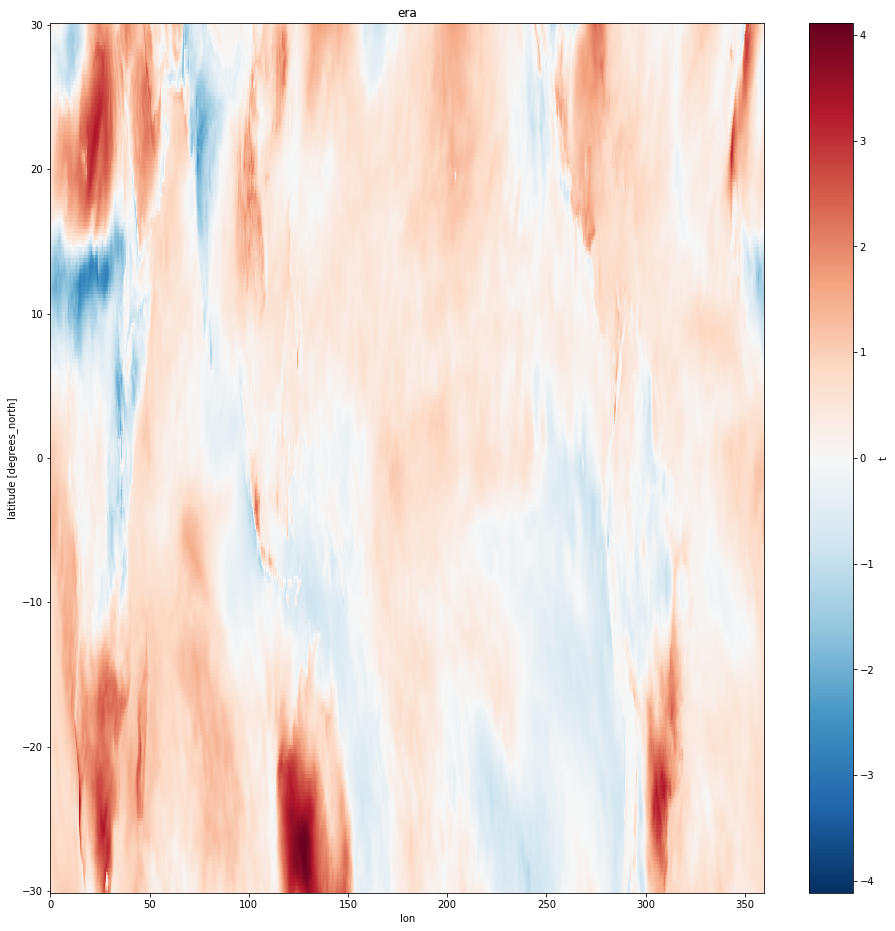

In [18]:
fig_era

In [19]:
fig_model

<Figure size 1152x1152 with 0 Axes>

In [20]:
ih_for = xr.open_dataset("/scratch/w40/gp8431/run/2001_srfamp_"+x+"/plevel_avg_ih.nc", decode_times = False)

In [21]:
ih_for.local_heating.values

array([[[[          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         ...,
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan]],

        [[1.4762179e-29, 7.6709278e-29, 3.6829238e-28, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [1.6178528e-28, 8.4076587e-28, 4.0370049e-27, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [1.6682174e-27, 8.6706090e-27, 4.1638593e-26, .

In [22]:
diff.values

array([-3.3235164], dtype=float32)

In [28]:
ih_for.local_heating

<xarray.DataArray 'local_heating' (time: 1, pfull: 17, lat: 64, lon: 128)>
array([[[[         nan, ...,          nan],
         ...,
         [         nan, ...,          nan]],

        ...,

        [[1.432765e-33, ..., 0.000000e+00],
         ...,
         [1.672721e-33, ..., 0.000000e+00]]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * pfull    (pfull) float32 1000.0 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * time     (time) float64 750.0
Attributes:
    long_name:      Local heating (deg/sec)
    units:          deg/sec
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT

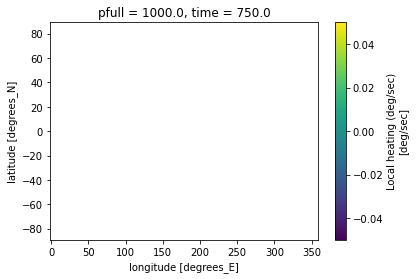

In [30]:
ih_for.local_heating.sel(pfull=1000).plot(x="lon", y="lat")